### See below for some interesting plots regarding Capital Metro ridership patterns around the UT-Austin campus

#### For the CapMetro Data around the UT-Austin campus, we can see a couple of interesting scenarios. The first one is the number of people getting off at the UT campus on or before 8am. Our initial thought was that the majority of these people would be workers at various stores/eateries/shops on/around the campus as well as the other campus facilities, since its likely that these workers live in other parts of Austin. There is an afternoon spike of people leaving the campus, which would be a combination of students leaving class as well as the workers leaving as well. An interesting way to get better data would be to see who scanned into these buses with their UT ID, which would help us get a better understanding of whether students are the ones using the buses or others, since the workers at the restaurants/shops on Guadalpue/MLK street would also be making up these numbers. We can also see that October is the spike of the ridership, which makes sense since UT is in full session in October, and there are also other events such as football games that are happening on campus. There are some holidays in September and November, which could be contributing to the slight decline in ridership since there would be a few days (Labor Day, Thanksgiving/Black Friday) where there would be little ridership. 

In [15]:
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [16]:
df = pd.read_csv("capmetro_UT.csv")
#print(df.describe())
df

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend
...,...,...,...,...,...,...,...,...
5819,2018-11-30 20:45:00,43,29,Fri,70.73,20,Nov,weekday
5820,2018-11-30 21:00:00,24,19,Fri,69.88,21,Nov,weekday
5821,2018-11-30 21:15:00,33,16,Fri,69.88,21,Nov,weekday
5822,2018-11-30 21:30:00,25,15,Fri,69.88,21,Nov,weekday


In [17]:
#df["alighting"].plot(kind = "hist")

In [18]:
#df["boarding"].plot(kind = "hist")

In [19]:
#df["temperature"].plot(kind = "hist")

In [20]:
#df["hour_of_day"].plot(kind = "hist")

### Average boarding and alighting per month 

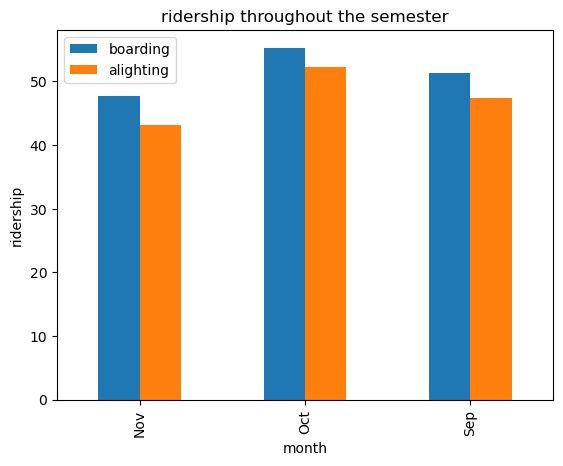

In [22]:
df.groupby("month")[["boarding", "alighting"]].mean().plot(kind = "bar")
plt.title('ridership throughout the semester')
plt.xlabel('month')
plt.ylabel('ridership')
plt.legend(loc='best')
plt.show()

### Average boarding and alighting for each day of the week

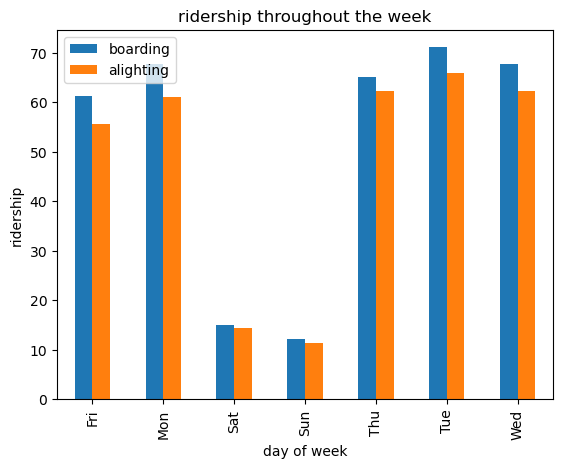

In [24]:
df.groupby("day_of_week")[["boarding", "alighting"]].mean().plot(kind = "bar")
plt.title('ridership throughout the week')
plt.xlabel('day of week')
plt.ylabel('ridership')
plt.legend(loc='best')
plt.show()

### How total boarding and alighting change throughout the day

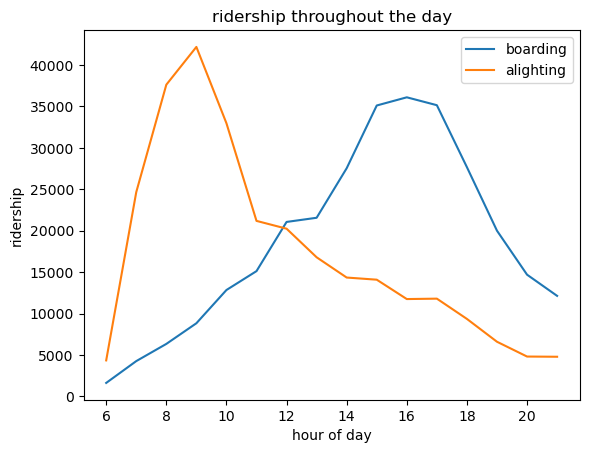

In [26]:
df.groupby("hour_of_day")[["boarding", "alighting"]].sum().plot(kind = "line")
plt.title('ridership throughout the day')
plt.xlabel('hour of day')
plt.ylabel('ridership')
plt.legend(loc='best')
plt.show()

### How average boarding and alighting change throughout the day for each day

<Figure size 1200x800 with 0 Axes>

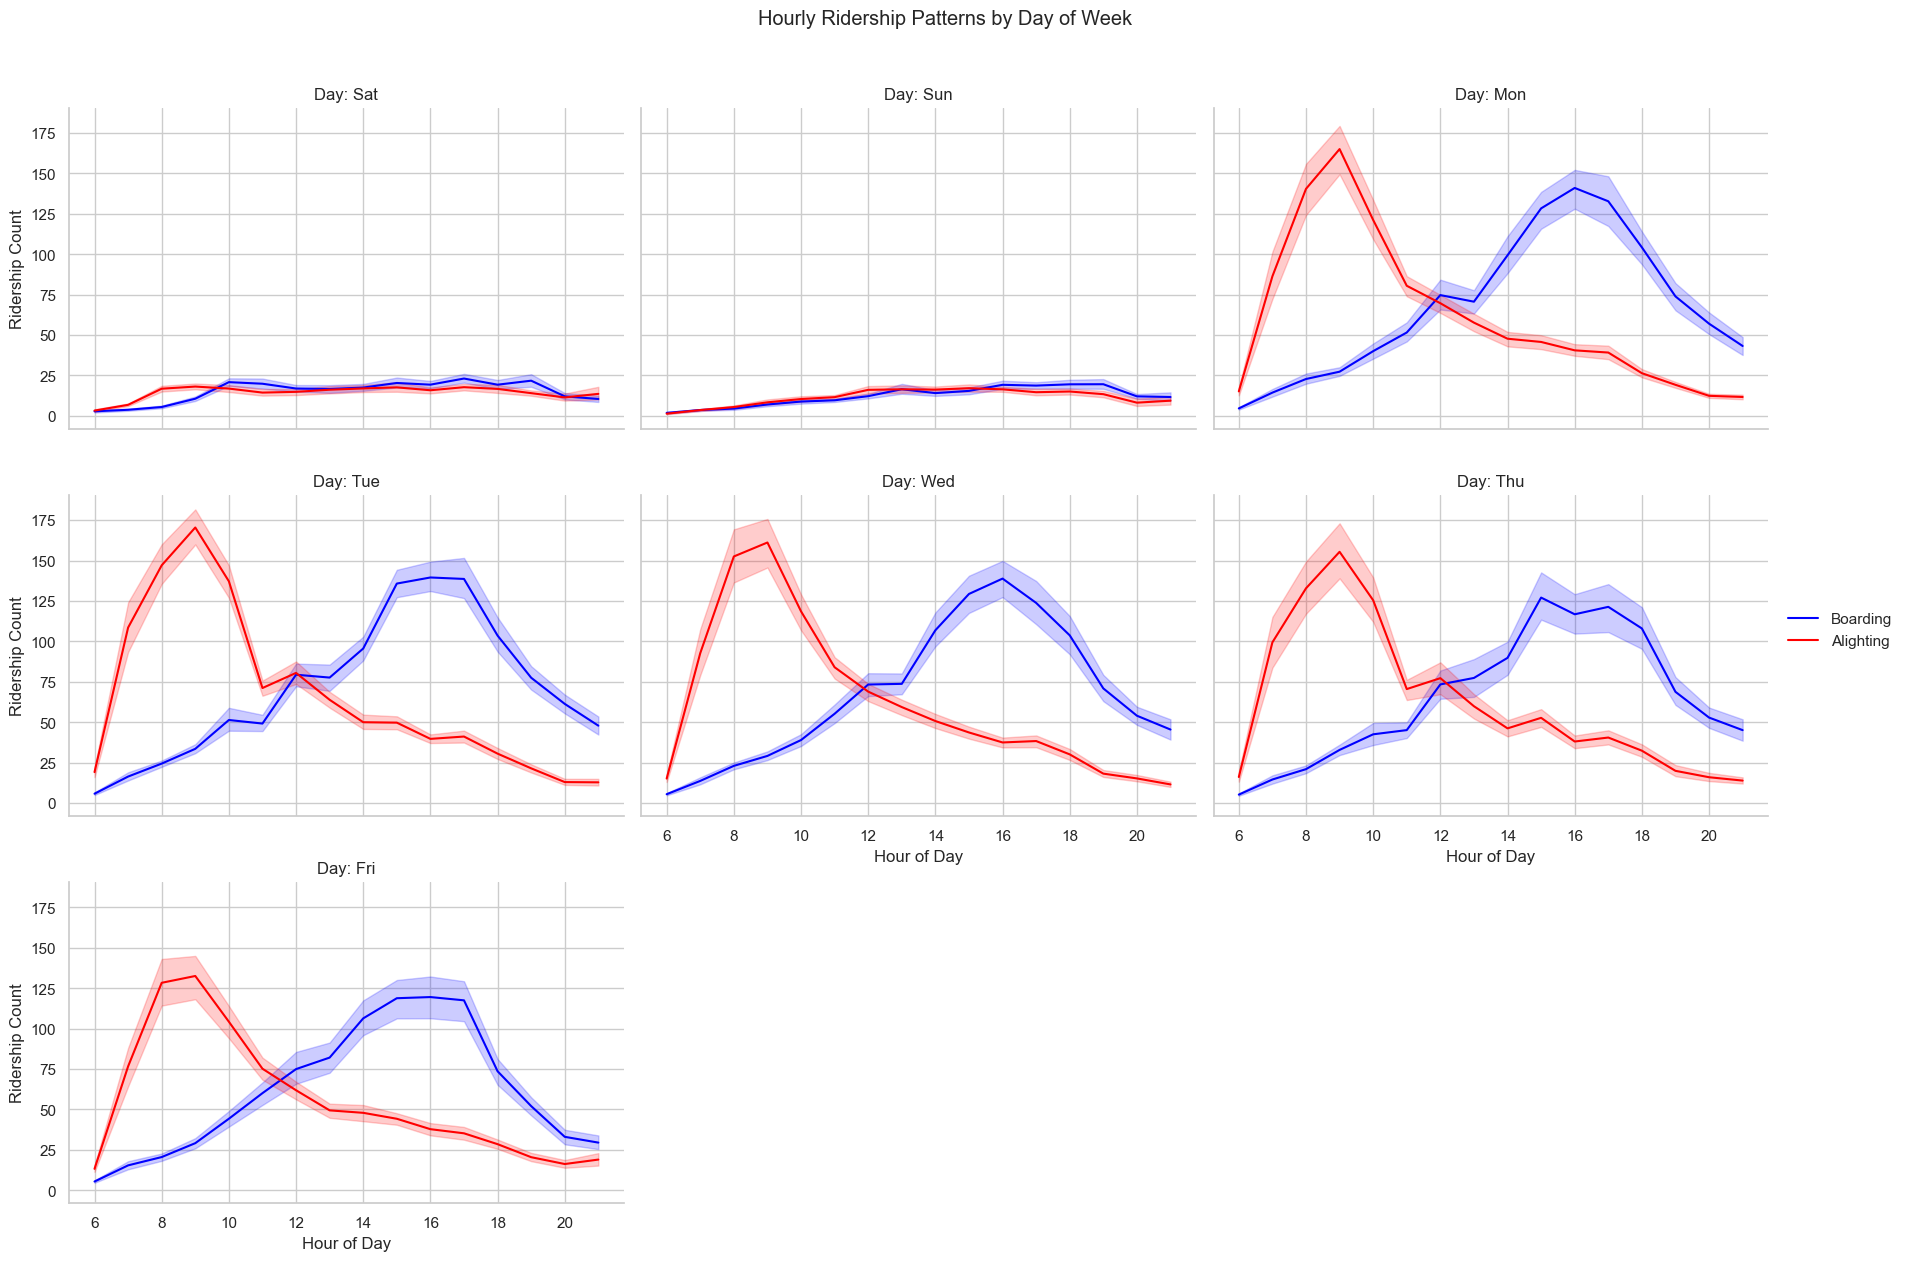

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(df, col='day_of_week', col_wrap=3, height=4, aspect=1.5)
g.map(sns.lineplot, 'hour_of_day', 'boarding', color='blue', label='Boarding')
g.map(sns.lineplot, 'hour_of_day', 'alighting', color='red', label='Alighting')
g.add_legend()
g.set_axis_labels("Hour of Day", "Ridership Count")
g.set_titles("Day: {col_name}")
g.fig.suptitle("Hourly Ridership Patterns by Day of Week", y=1.05)
plt.show()

### How average boarding and alighting changes throughout the day on weekends vs weekdays

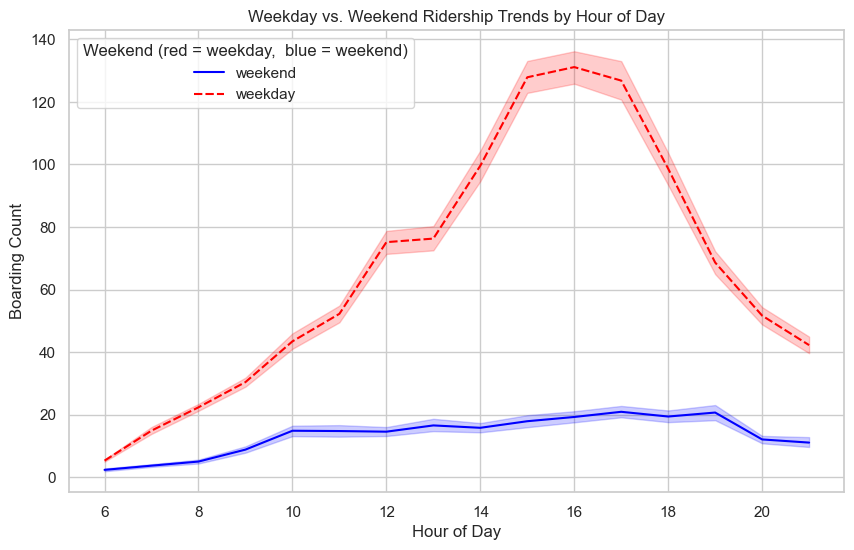

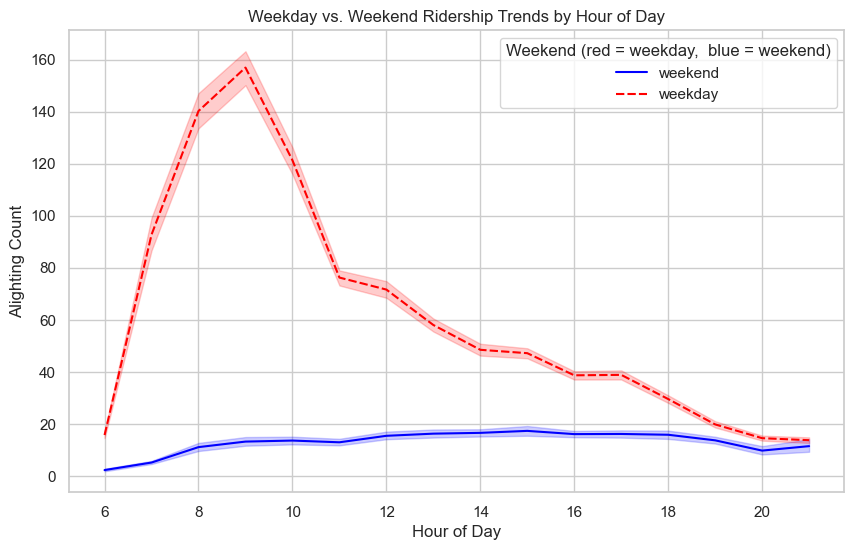

In [30]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour_of_day', y='boarding', hue='weekend', style='weekend', data=df, palette={"weekend": 'blue', "weekday": 'red'})
plt.title('Weekday vs. Weekend Ridership Trends by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Boarding Count')
plt.legend(title='Weekend (red = weekday,  blue = weekend)')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='hour_of_day', y='alighting', hue='weekend', style='weekend', data=df, palette={"weekend": 'blue', "weekday": 'red'})
plt.title('Weekday vs. Weekend Ridership Trends by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Alighting Count')
plt.legend(title='Weekend (red = weekday,  blue = weekend)')
plt.show()

### Average boarding for each hour for each month of the semester

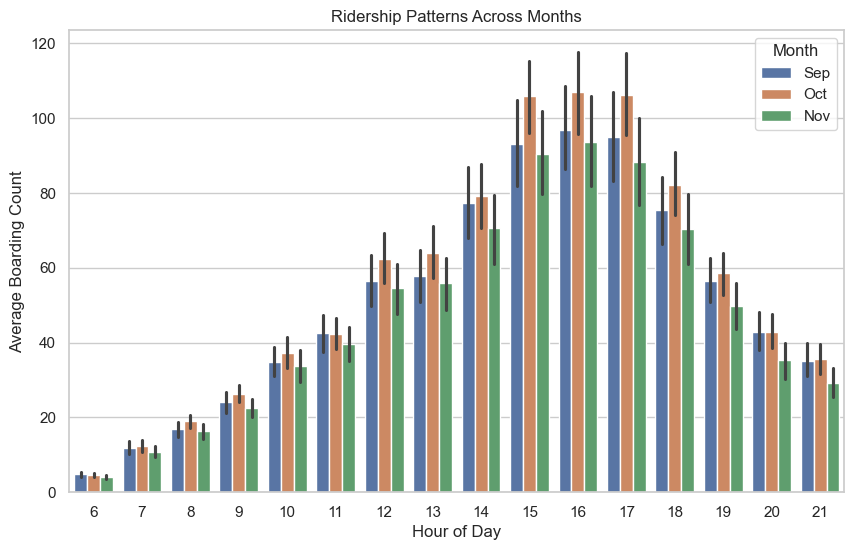

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hour_of_day', y='boarding', hue='month', data=df)
plt.title('Ridership Patterns Across Months')
plt.xlabel('Hour of Day')
plt.ylabel('Average Boarding Count')
plt.legend(title='Month')
plt.show()

### correlation matrix

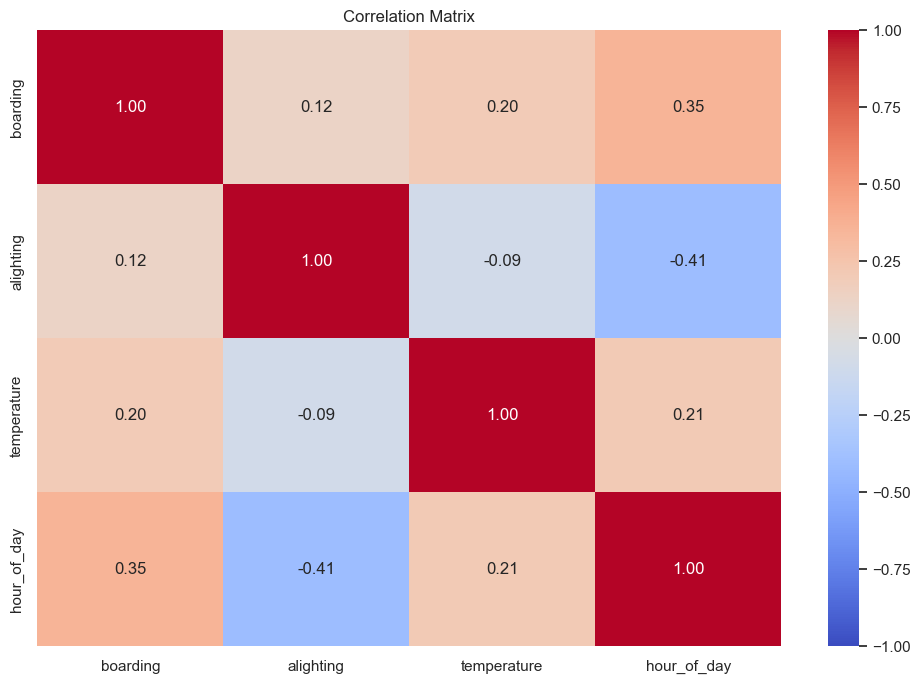

,boarding,alighting,temperature,hour_of_day
boarding,1.000000,0.120225,0.197585,0.351907
alighting,0.120225,1.000000,-0.086401,-0.410906
temperature,0.197585,-0.086401,1.000000,0.210037
hour_of_day,0.351907,-0.410906,0.210037,1.000000


In [34]:
dfn = df[["boarding", "alighting", "temperature", "hour_of_day"]]
correlation_matrix = dfn.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

correlation_matrix